# Human Heart Disease----Classification model

# Understanding the problem statement

In [1]:
#Dataset source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

__1. IMPORTING LIBRARIES AND READING DATASET__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
ls

HeartDieasePrediction_randomforest.ipynb
Heart_Disease_and_Stroke_Classification.ipynb*
heart.csv
strokeprediction.csv*


In [4]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


__2. EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION__

 __Data Description__

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.size

14350

In [7]:
df.shape

(1025, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

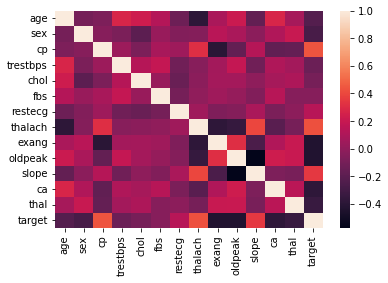

In [11]:
sns.heatmap(df.corr())

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

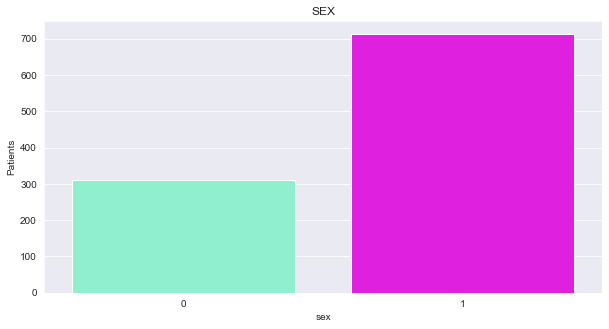

In [14]:
# Check the Distribution of target data
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['sex'], alpha = 1, palette= ['aquamarine','magenta','mediumblue'])
plt.title('SEX')
plt.ylabel('Patients')
plt.show()

THE VALUE OF FEMALE PATIENTS ARE VERY LESS THAN MALE PATIENTS,SO,AS THE DATA IS UNBALANCED

In [15]:
col=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
for i in col:
    
    print(i.capitalize())
    print('Number of unique data:',df[i].nunique())
    print("Value Counts")
    print(df[i].value_counts())
    print("")
    print("****************************************************************************************************")
    print("")

Age
Number of unique data: 41
Value Counts
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64

****************************************************************************************************

Sex
Number of unique data: 2
Value Counts
1    713
0    312
Name: sex, dtype: int64

****************************************************************************************************

Cp
Number of unique data: 4
Value Counts
0    497
2    284
1    167
3     77
Name: cp, dtype: int64

****************************************************************************************************

Trestbps
Number of unique data: 49
Value Counts
120    128
130    123
1

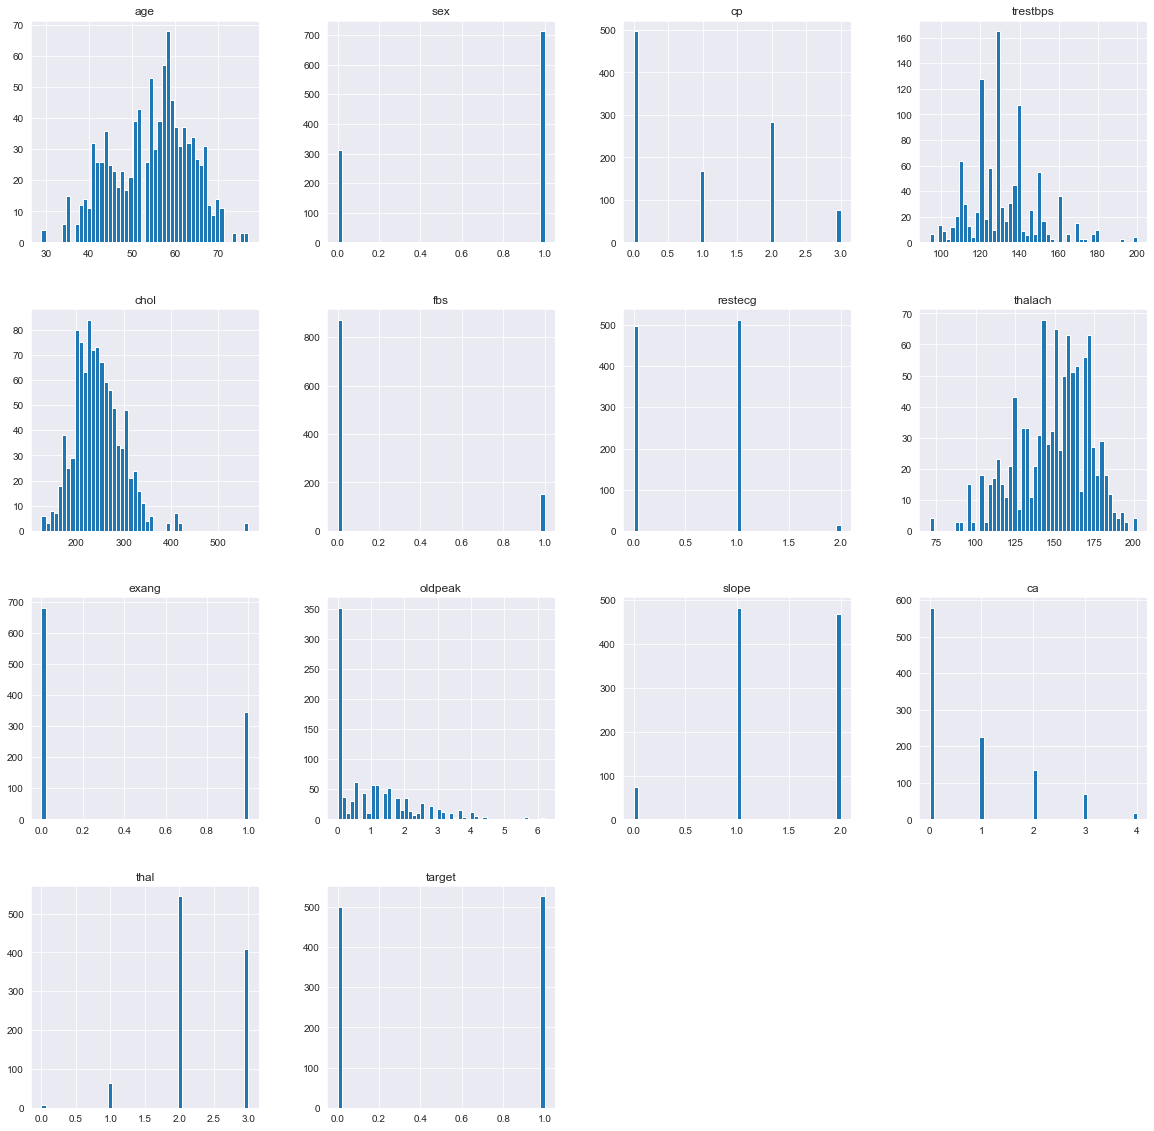

In [16]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [17]:
df.corr()['target'].sort_values()

oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [19]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

__3.DATA VISUALIZATION__

1    526
0    499
Name: target, dtype: int64


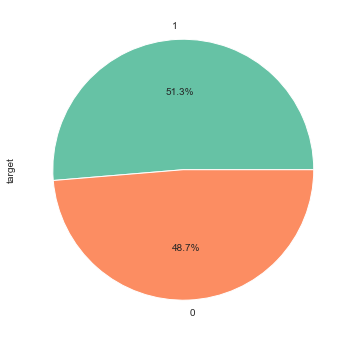

In [85]:
print(df["target"].value_counts())
df["target"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6));

In [21]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [22]:
#df2 = df.copy()
#def chng(sex):
#    if sex == 0:
#        return 'female'
#    else:
#        return 'male'
#df2['sex'] = df2['sex'].apply(chng)
#def chng2(prob):
#    if prob == 0:
#        return ‘Heart Disease’
#    else:
#        return ‘No Heart Disease’
#df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

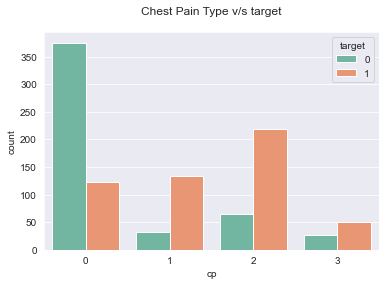

In [23]:
sns.countplot(data= df, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


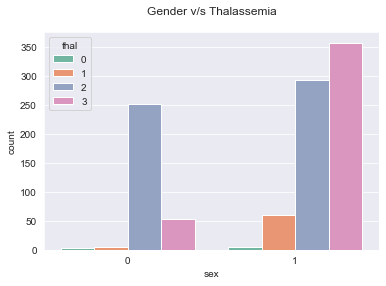

In [24]:
sns.countplot(data= df, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

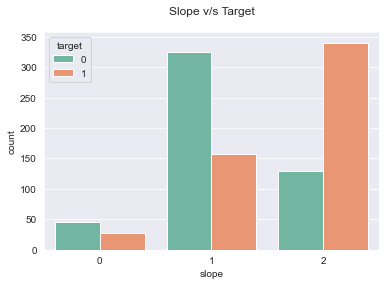

In [25]:
sns.countplot(data= df, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

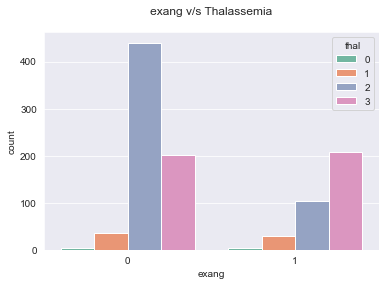

In [26]:
sns.countplot(data= df, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

In [27]:
df['target'].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [28]:
df[df['target']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
age,499.000000,56.569138,7.908153,35.000000,52.000000,58.000000,62.000000,77.000000
sex,499.000000,0.827655,0.378059,0.000000,1.000000,1.000000,1.000000,1.000000
cp,499.000000,0.482966,0.908024,0.000000,0.000000,0.000000,0.000000,3.000000
trestbps,499.000000,134.106212,18.576736,100.000000,120.000000,130.000000,144.000000,200.000000
chol,499.000000,251.292585,49.558924,131.000000,217.000000,249.000000,284.000000,409.000000
fbs,499.000000,0.164329,0.370945,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,499.000000,0.456914,0.544825,0.000000,0.000000,0.000000,1.000000,2.000000
thalach,499.000000,139.130261,22.565235,71.000000,125.000000,142.000000,156.000000,195.000000
exang,499.000000,0.549098,0.498083,0.000000,0.000000,1.000000,1.000000,1.000000
oldpeak,499.000000,1.600200,1.290956,0.000000,0.600000,1.400000,2.500000,6.200000


In [29]:
df[df['target']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
age,526.000000,52.408745,9.631804,29.000000,44.000000,52.000000,59.000000,76.000000
sex,526.000000,0.570342,0.495498,0.000000,0.000000,1.000000,1.000000,1.000000
cp,526.000000,1.378327,0.945881,0.000000,1.000000,2.000000,2.000000,3.000000
trestbps,526.000000,129.245247,16.112188,94.000000,120.000000,130.000000,140.000000,180.000000
chol,526.000000,240.979087,53.010345,126.000000,208.000000,234.000000,265.750000,564.000000
fbs,526.000000,0.134981,0.342029,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,526.000000,0.598859,0.502109,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,526.000000,158.585551,19.096928,96.000000,149.000000,161.500000,172.000000,202.000000
exang,526.000000,0.134981,0.342029,0.000000,0.000000,0.000000,0.000000,1.000000
oldpeak,526.000000,0.569962,0.771079,0.000000,0.000000,0.200000,1.000000,4.200000


In [30]:
df['target'].skew()

-0.05277848219047285

In [31]:
df['target'].kurtosis()

-2.0011228802510272

__4 .DATA ANALYSIS----FEATURE SELECTION__

In [32]:
x= df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

In [33]:
y = df['target']

__5 .MODEL BUILDING__

__Random Forest__

In [34]:
#splitting data

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5,random_state = None)

In [36]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(512, 13) (513, 13) (512,) (513,)


In [37]:
###Balancing the Dataset

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE()

In [40]:
x_train,y_train = smote.fit_resample(x_train,y_train)
x_test,y_test = smote.fit_resample(x_test,y_test)

In [41]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(534, 13) (562, 13) (534,) (562,)


In [42]:
x_train['sex'].shape

(534,)

__ONEHOTENCODING__

In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', drop=None, sparse=False, dtype= 'float64')

In [45]:
df1= df[['cp','restecg','slope','ca','thal']]

In [46]:
df2 = ohe.fit_transform(df1)

In [47]:
df2

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [48]:
c = ohe.get_feature_names() # Gives us column index names
c

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x1_0', 'x1_1', 'x1_2', 'x2_0',
       'x2_1', 'x2_2', 'x3_0', 'x3_1', 'x3_2', 'x3_3', 'x3_4', 'x4_0',
       'x4_1', 'x4_2', 'x4_3'], dtype=object)

In [49]:
df3 = pd.DataFrame(df2, columns = c)

Merging OneHotEncoded Dataframe with normal data Frame

In [50]:
ohe_df = pd.concat([df,df3], axis=1)

In [51]:
ohe_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,x2_2,x3_0,x3_1,x3_2,x3_3,x3_4,x4_0,x4_1,x4_2,x4_3
0,52,1,0,125,212,0,1,168,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,53,1,0,140,203,1,0,155,1,3.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,70,1,0,145,174,0,1,125,1,2.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,61,1,0,148,203,0,1,161,0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,62,0,0,138,294,1,1,106,0,1.9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1021,60,1,0,125,258,0,0,141,1,2.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1022,47,1,0,110,275,0,0,118,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1023,50,0,0,110,254,0,0,159,0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


__FEATURE SCALING__

In [53]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [54]:
ohe_df["age"] = scale.fit_transform(np.array(ohe_df["age"]).reshape(-1,1))

In [55]:
ohe_df["trestbps"] = scale.fit_transform(np.array(ohe_df["trestbps"]).reshape(-1,1))

In [56]:
ohe_df["chol"] = scale.fit_transform(np.array(ohe_df["chol"]).reshape(-1,1))

In [57]:
ohe_df["thalach"] = scale.fit_transform(np.array(ohe_df["thalach"]).reshape(-1,1))

In [58]:
ohe_df["oldpeak"] = scale.fit_transform(np.array(ohe_df["oldpeak"]).reshape(-1,1))

In [59]:
ohe_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,x2_2,x3_0,x3_1,x3_2,x3_3,x3_4,x4_0,x4_1,x4_2,x4_3
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1,1,0.433962,0.216895,0,1,0.709924,1,0.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1021,0.645833,1,0,0.292453,0.301370,0,0,0.534351,1,0.451613,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1022,0.375000,1,0,0.150943,0.340183,0,0,0.358779,1,0.161290,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1023,0.437500,0,0,0.150943,0.292237,0,0,0.671756,0,0.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#fit the model

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
regressor=RandomForestClassifier()

In [62]:
regressor.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
#prediction

In [64]:
y_pred = regressor.predict(x_test)

In [65]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,

__Model Evaluation__

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy=accuracy_score(y_test,y_pred)

In [69]:
accuracy

0.9501779359430605

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       281
           1       0.93      0.98      0.95       281

    accuracy                           0.95       562
   macro avg       0.95      0.95      0.95       562
weighted avg       0.95      0.95      0.95       562



 The classification report of the model shows that 95% prediction of absence of heart disease was predicted correct and 98% of presence of heart disease was predicted correct

[[260  21]
 [  7 274]]


<AxesSubplot:>

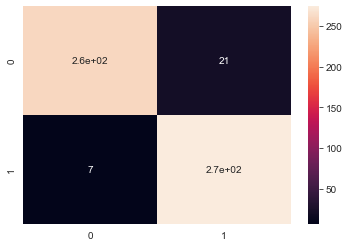

In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

__CROSS VALIDATION__

In [73]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [74]:
skf= StratifiedKFold(n_splits=10,shuffle=True,random_state=None)

In [75]:
rf_cv_score =cross_val_score(regressor,x,y,cv=skf)

In [76]:
rf_cv_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [77]:
rf_cv_score_mean = rf_cv_score.mean()
rf_cv_score_mean

1.0

In [78]:
rf_cv_score_std = rf_cv_score.std()

In [79]:
rf_cv_score_std 

0.0

In [80]:
#REAL TIME PREDICTION

In [81]:
import joblib
joblib.dump(regressor,"regressor.pkl")

['regressor.pkl']

In [82]:
final = x.head(1)
final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [83]:
finaltest= joblib.load("regressor.pkl")

In [84]:
finaltest.predict(final)

array([0])